# Predicting Bank Churn with CatBoost Model

## Author: Linh Nguyen

### Project Overview

In this project, I aim to predict bank customer churn using advanced machine learning techniques, particularly leveraging the CatBoostClassifier. Customer churn, or the rate at which customers leave a service, is a critical concern for businesses, especially in the banking sector. Identifying and understanding the factors contributing to churn can help financial institutions take proactive measures to retain valuable customers.

### Dataset

The dataset contains various features such as customer demographics, transaction history, and interaction data. The target variable, 'Exited,' indicates whether a customer has churned (1) or not (0).

### Methodology

My approach involves preprocessing the data, utilizing CatBoost, a powerful gradient boosting algorithm, for predictive modeling, and evaluating the model's performance through metrics such as accuracy, precision, recall, and F1 score.

### Significance

- **Customer Retention:** Predicting churn enables banks to take preemptive actions to retain customers, potentially saving on acquisition costs.

- **Model Interpretability:** CatBoost provides insights into feature importance, aiding in understanding the drivers behind customer churn.

- **Optimizing Strategies:** With a robust predictive model, banks can tailor strategies to address specific factors leading to churn, improving overall customer satisfaction.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
train_data = pd.read_csv('~/Downloads/playground-series-s4e1/train.csv')

In [4]:
test_data = pd.read_csv('~/Downloads/playground-series-s4e1/test.csv')

In [5]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [8]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [9]:
train_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
train_data.duplicated().sum()

0

/Users/linhnguyen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


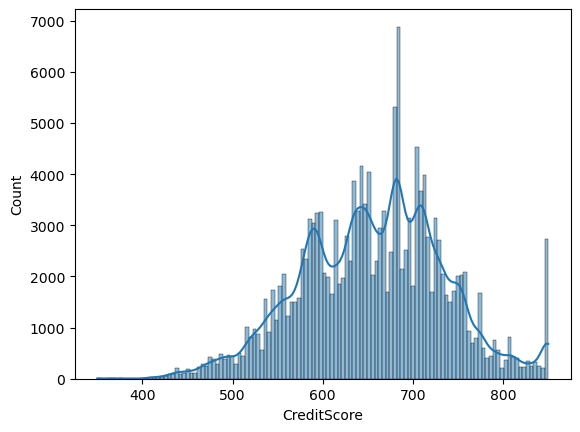

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train_data['CreditScore'], kde=True)
plt.show()

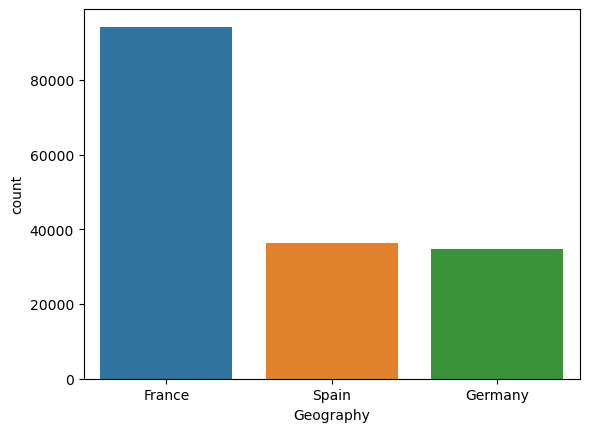

In [12]:
# Count plot for categorical variables
sns.countplot(x='Geography', data=train_data)
plt.show()

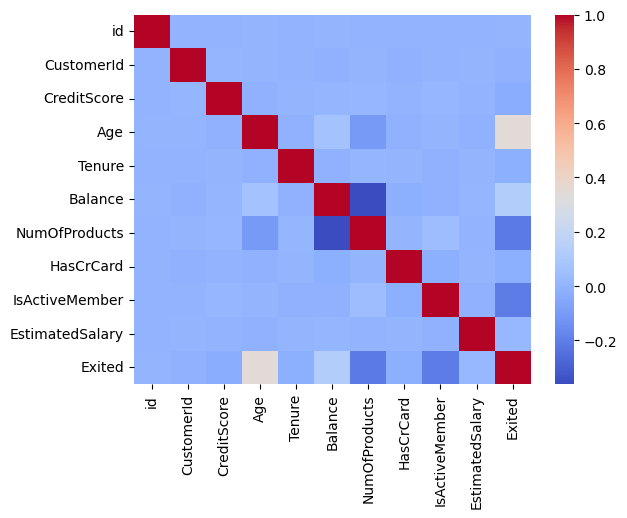

In [13]:
# Exclude non-numeric columns
numeric_columns = train_data.select_dtypes(include=['number'])

# Correlation matrix for numerical variables
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

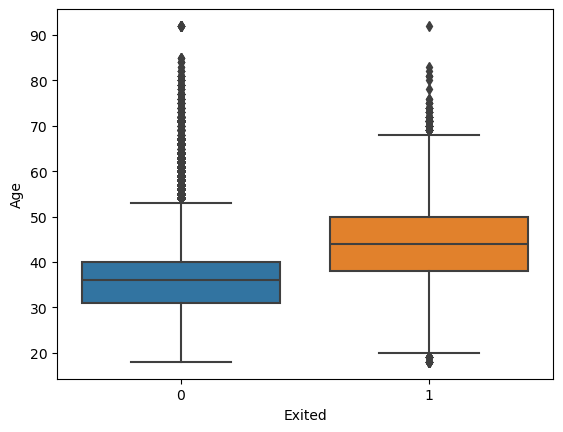

In [14]:
sns.boxplot(x='Exited', y='Age', data=train_data)
plt.show()

/Users/linhnguyen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/linhnguyen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/linhnguyen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/linhnguyen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

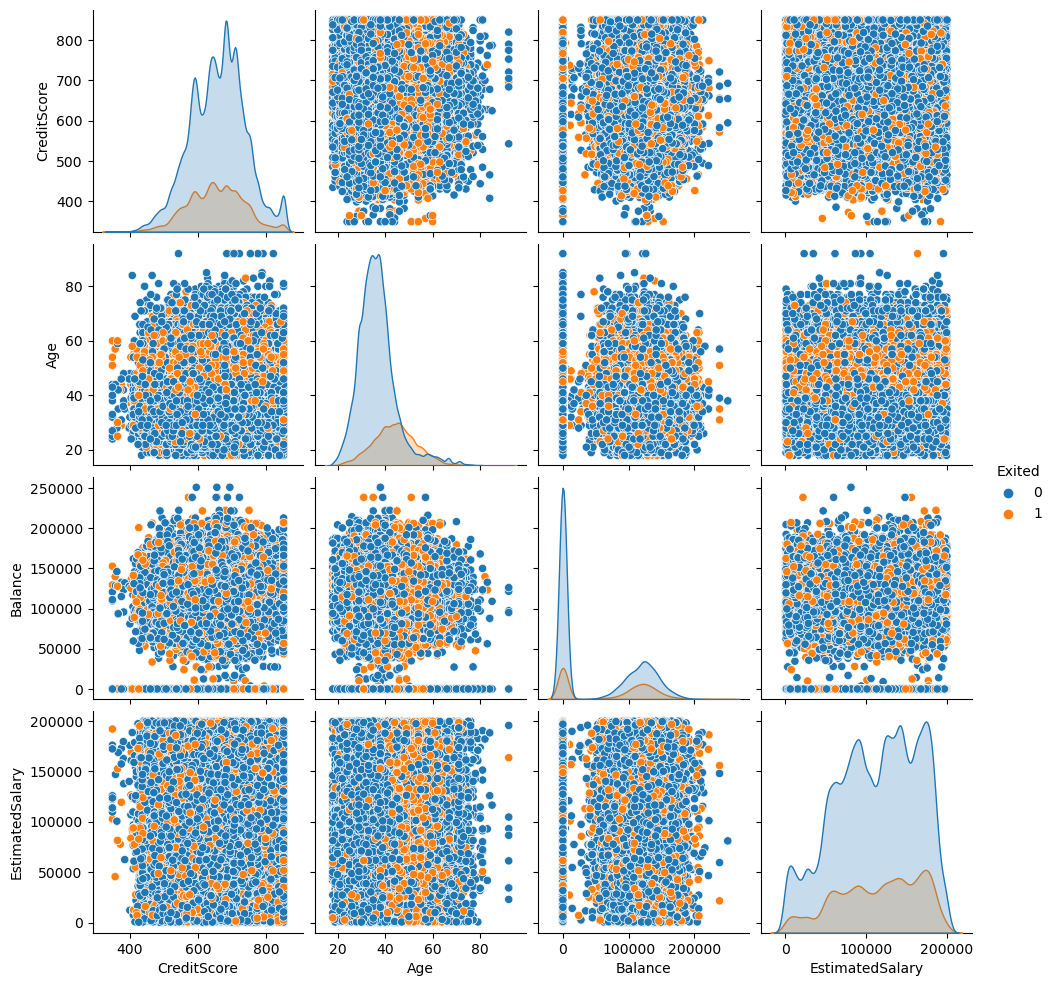

In [15]:
# Pair plots for selected variables
sns.pairplot(train_data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

/Users/linhnguyen/anaconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [17]:
X= train_data.drop(['Exited', 'Surname', 'CustomerId'], axis=1)
y = train_data['Exited']

In [18]:
cat_cols = ['Geography', 'Gender']

In [19]:
le = LabelEncoder()
X[cat_cols] = X[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=127)

In [21]:
cbb=CatBoostClassifier(random_state=127, verbose=False)

In [22]:
cbb.fit(X_train,y_train)

In [23]:
y_pred = cbb.predict(X_test)

In [24]:
# Classification Report
report = classification_report(y_test, y_pred)

print("Classification Report of CatBoostClassifier:\n")
print(report)

Classification Report of CatBoostClassifier:

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     25987
           1       0.75      0.55      0.63      7020

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007



In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[24713  1274]
 [ 3163  3857]]


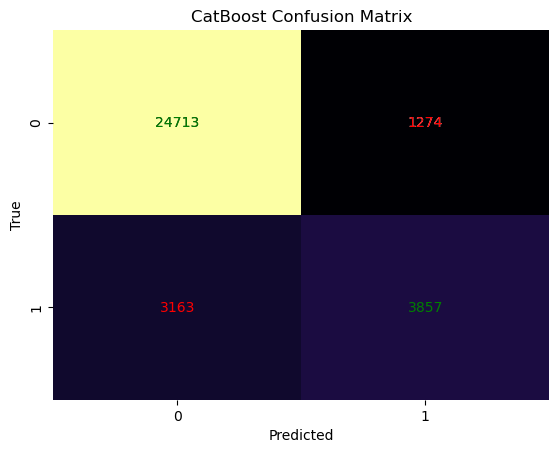

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno', cbar=False)

plt.title('CatBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
# Manually annotate TP, TN, FP, FN
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='red' if i != j else 'green')

plt.show()

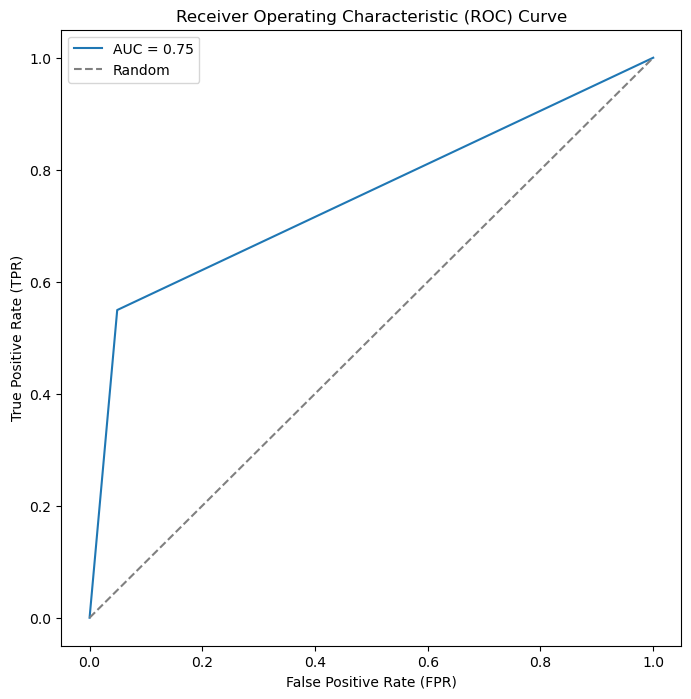

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc_roc = roc_auc_score(y_test, y_pred)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [30]:
X_test1 = test_data.drop(['Surname', 'CustomerId'], axis=1)
X_test1[cat_cols] = X_test1[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

# Use predict_proba to get predicted probabilities
predicted_probabilities = cbb.predict_proba(X_test1)[:, 1]

# Create a DataFrame with IDs and predicted probabilities
result_df = pd.DataFrame({'id': range(165034, 165034 + len(X_test1)), 'Exited': predicted_probabilities})

# Display the result DataFrame
result_df.head()

,id,Exited
0,165034,0.017332
1,165035,0.853651
2,165036,0.016875
3,165037,0.214360
4,165038,0.292184
